In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [3]:
raw_steel = te.fetchMarkets(symbol=['JBP:COM'], initDate='2016-01-01', endDate='2019-12-31' , output_type='df')
raw_exports = te.getCmtHistorical(symbol = 'PRTWLDXX722', output_type='df')

In [4]:
raw_imports = te.getCmtHistorical(symbol = 'PRTWLDXX721', output_type='df')

In [5]:
steel = raw_steel[['close']].rename(columns={'close': 'Steel'})
steel.index.name = 'Date'

imports = raw_imports[['value', 'date']].rename(columns={'value': 'imports'})
imports['Date'] = pd.DatetimeIndex(imports['date'])
imports.set_index('Date', inplace=True)
del imports['date']

exports = raw_exports[['value', 'date']].rename(columns={'value': 'exports'})
exports['Date'] = pd.DatetimeIndex(exports['date'])
exports.set_index('Date', inplace=True)
del exports['date']

df = pd.merge(imports, exports, on ='Date')
df = df[df.index > '2016-01-31']

steel_yearly_avg = steel['Steel'].resample('Y').mean()
steel_yearly_avg=steel_yearly_avg.to_frame()


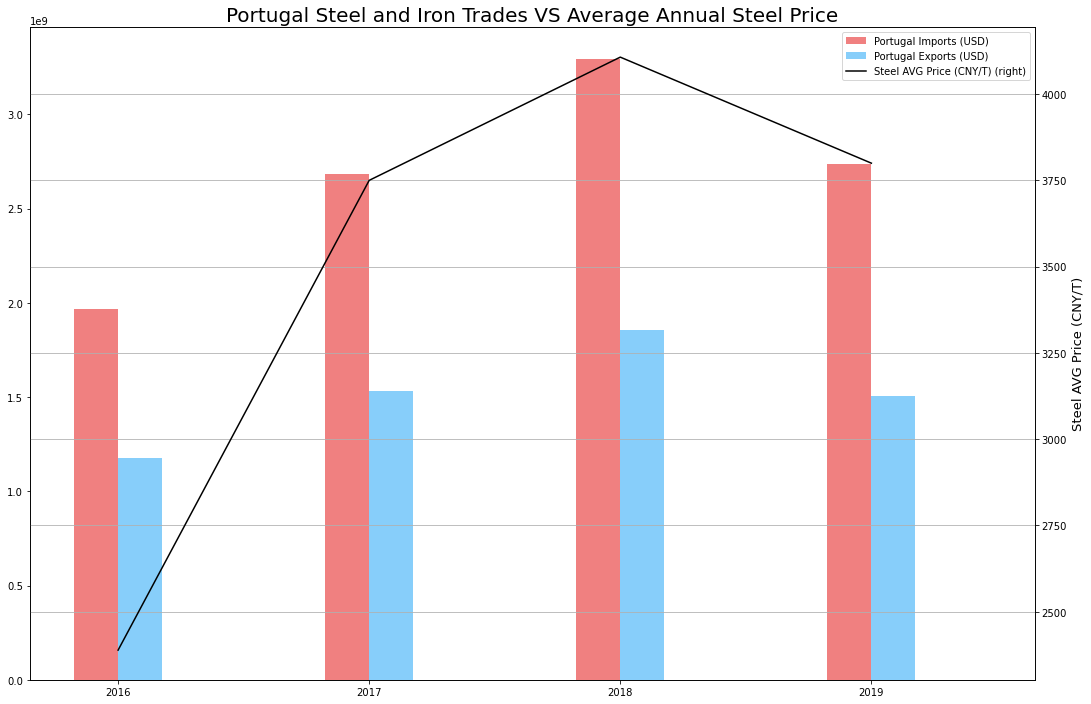

In [6]:
color_dict = {'imports': 'lightcoral', 'exports': 'lightskyblue'}

label = df.index.year
Imports = df['imports'].values.tolist()
Exports = df['exports'].values.tolist()
steel = steel_yearly_avg['Steel'].values.tolist()

width = .35

data = pd.DataFrame({
 'Portugal Imports (USD)' : Imports,
 'Portugal Exports (USD)' : Exports,
 'Steel AVG Price (CNY/T)' : steel})


data[['Portugal Imports (USD)','Portugal Exports (USD)']].plot(kind='bar', width = width,figsize=(18, 12), color=[color_dict.get(x, '#333333') for x in df.columns])
data['Steel AVG Price (CNY/T)'].plot(secondary_y=True, color='black',legend='s')
ax = plt.gca()

ax.set_title('Portugal Steel and Iron Trades VS Average Annual Steel Price', color='black', size=20)
plt.xlim([-width, len(data['Portugal Imports (USD)'])-width])

plt.ylabel('Steel AVG Price (CNY/T)', fontsize=13)
ax.set_xticklabels((label))

plt.grid()
plt.show()
